# UBC Scientific Software Seminar

## January 27, 2017


In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Introduction to neural networks

A neural network is another kind of algorithm to build a model based on data so that we can make predictions on new data. As a first example, a *multi-layered perceptron* (or *feedforward neural network*) is simply a function of the form:

$$
F(\mathbf{x}; W,b) = (F_L \circ \cdots \circ F_1)(\mathbf{x})
$$

where layer $\ell -1$ is connected to layer $\ell$ by a function $F_{\ell}$ is of the form

$$
F_{\ell}(\mathbf{a}^{\ell}; W^{\ell},b^{\ell}) = \sigma(W^{\ell} \mathbf{a}^{\ell} + b^{\ell})
$$

such that:

* $\sigma$ is the (vectorized) sigmoid function $\sigma(z) = \frac{1}{1 + e^{-z}}$
* $W^{\ell}$ is the weight matrix (at layer $\ell$) of size $n_{\ell + 1}$ by $n_{\ell}$
* $b^{\ell}$ is the bias vectors (at layer $\ell$) of size $n_{\ell + 1}$
* $\mathbf{a}^{\ell}$ is the vector of input activations at layer $\ell$ of size $n_{\ell}$

The function $F$ is a composition of affine transformations (composed with a sigmoid function).

**GOAL:** Given a training set $\{ \mathbf{x}_i \}_i$ of $N$ samples with corresponding output labels $\{ \mathbf{y}_i \}$, we would like to optimize the network parameters $W$ (weights) and $b$ (biases) relative to a cost function such as the squared error:

$$
C(W,b) = \frac{1}{N} \sum_{i = 1}^N || \mathbf{y}_i - F(\mathbf{x}_i; W,b)||^2
$$

**IDEA:** Chose some initial guess for the weights and biases and use gradient descent to find optimal values relative to the cost function.

**CHALLENGES:** If the sample space is large (like a high resolution JPEG image), and if the number of samples $N$ is large, and if the number of layers $L$ is large, and if the size of each layer $n_{\ell}$ is large... then this is a hard computational problem!

**STRATEGY:** Stochastic gradient descent and backpropagation!

## 2. Structure of a neural netwrok

### A neural network with no hidden layers is just logistic regression

(-0.5, 3.5, 0.5, 4.5)

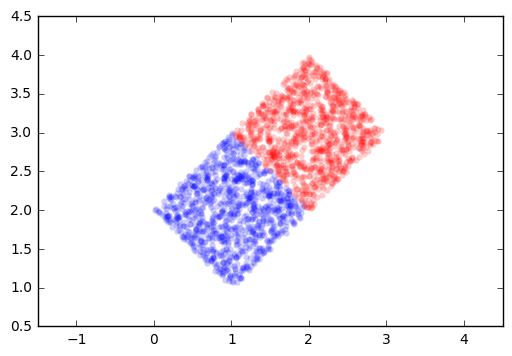

In [56]:
N = 1000; 
blue_X = np.random.rand(N,2) @ np.array([[1,1],[-1,1]]) + np.array([1,1]).reshape(1,2)
red_X = np.random.rand(N,2) @ np.array([[1,1],[-1,1]]) + np.array([2,2]).reshape(1,2)

plt.scatter(blue_X[:,0],blue_X[:,1],c='b',lw=0,alpha=0.2);
plt.scatter(red_X[:,0],red_X[:,1],c='r',lw=0,alpha=0.2);
plt.axis('equal')

In [57]:
X = np.vstack([blue_X,red_X])
y = np.concatenate([np.zeros(N),np.ones(N)])

In [58]:
from sklearn.linear_model import LogisticRegression as LR

In [59]:
reg = LR()

In [60]:
reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
X_test = np.array([[a,b] for a in np.linspace(0,3,50) for b in np.linspace(1,4,50)])

In [62]:
y_test = reg.predict(X_test)

(-0.5, 3.5, 0.5, 4.5)

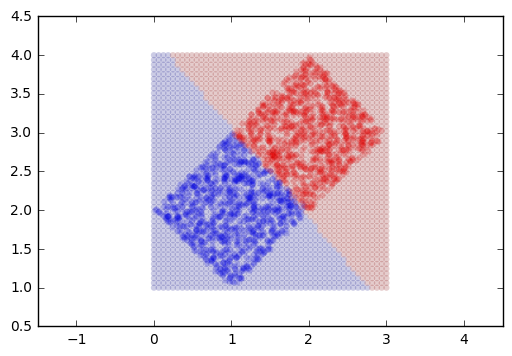

In [63]:
plt.scatter(blue_X[:,0],blue_X[:,1],c='b',lw=0,alpha=0.2)
plt.scatter(red_X[:,0],red_X[:,1],c='r',lw=0,alpha=0.2)

plt.scatter(X_test[:,0],X_test[:,1],c=y_test,lw=0,alpha=0.2)
plt.axis('equal')

In [64]:
reg.coef_ #this is the weight matrix W

array([[ 3.87618318,  3.31638296]])

In [65]:
reg.intercept_

array([-14.0369897])

So let's do the same thing but now use a neural network object from sklearn

In [66]:
from sklearn.neural_network import MLPClassifier as mlp

In [94]:
nn = mlp(hidden_layer_sizes=(1,),activation='logistic',max_iter=2000,alpha=0.001)

In [95]:
nn.fit(X,y)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

(-0.5, 3.5, 0.5, 4.5)

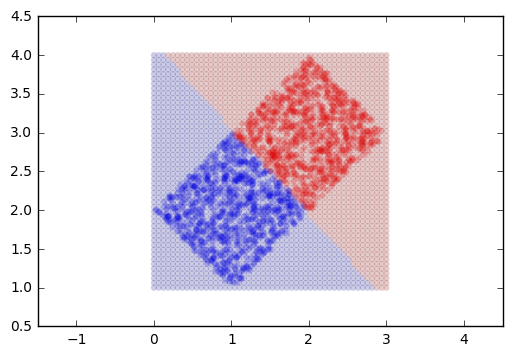

In [96]:
y_nn_test = nn.predict(X_test)

plt.scatter(blue_X[:,0],blue_X[:,1],c='b',lw=0,alpha=0.2)
plt.scatter(red_X[:,0],red_X[:,1],c='r',lw=0,alpha=0.2)

plt.scatter(X_test[:,0],X_test[:,1],c=y_nn_test ,lw=0,alpha=0.2)
plt.axis('equal')

In [97]:
nn.coefs_

[array([[-2.05473473],
        [-1.85010024]]), array([[-10.98925916]])]

## Handwritten Digits

In [98]:
from sklearn.datasets import load_digits

In [99]:
digits = load_digits()
X = digits.data
y = digits.target

In [100]:
X.shape

(1797, 64)

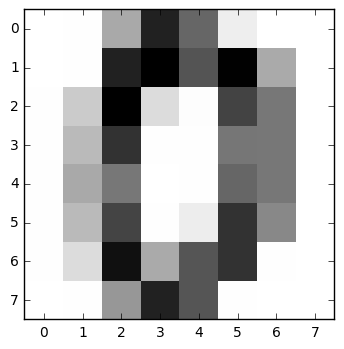

In [104]:
plt.imshow(X[0,:].reshape(8,8),cmap='binary',interpolation='none')

In [105]:
from sklearn.model_selection import train_test_split as tts

In [107]:
X_train, X_test, y_train, y_test= tts(X,y,test_size=0.2)

In [123]:
nn_digits = mlp(hidden_layer_sizes=(10,3),max_iter=1000)

In [ ]:
nn_digits.fit(X_train,y_train)

In [ ]:
nn_digits.score(X_test,y_test)

In [113]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [114]:
knn_clf = knn()

In [115]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [116]:
knn_clf.score(X_test,y_test)

0.98333333333333328